## Avocado Project

#### By Sajad Abdul Manaf
#### Batch - 0522

#### Problem Statement

Avocado is a fruit consumed by people heavily in the United States.


This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold
- Inspiration /Label

The dataset can be seen in two angles to find the region and find the average price.


Task: One of Classification and other of Regression


Do both tasks in the same .ipynb file and submit at single file.


To download the dataset, use the link given below.

Download Files: https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip

In [1]:
# Importing the Required Libraries

import pandas as pd # for data wrangling 
import numpy as np # Basic computation 
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filter warnings
warnings.filterwarnings('ignore')

In [74]:
#importing the Avocado dataset
df = pd.read_csv(r'C:\Users\sajad\Downloads\avocado.csv\avocado.csv')

In [4]:
print('No of Rows of Avocado dataset:',df.shape[0])
print('No of Columns of Avocado dataset::',df.shape[1])
df.head()

No of Rows of Avocado dataset: 18249
No of Columns of Avocado dataset:: 14


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

- Column - 'Unnamed: 0' is irrelavant by the firstlook itself, so it can be dropped

In [7]:
df.drop(['Unnamed: 0'],axis=1, inplace=True)

In [9]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


#### Data Integrity - Missing Nulls, Duplicates, Data type mismatches etc.

In [10]:
#Duplicate Check
df.duplicated().sum()

0

- No duplicate Values

<AxesSubplot:>

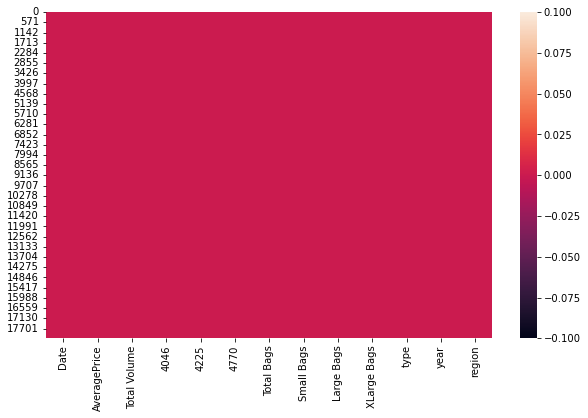

In [11]:
# Missing Values

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

- No Null Values

In [12]:
# Missing Values in Tabular Form

missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

              Missing Values  % Missing data
Date                       0             0.0
AveragePrice               0             0.0
Total Volume               0             0.0
4046                       0             0.0
4225                       0             0.0
4770                       0             0.0
Total Bags                 0             0.0
Small Bags                 0             0.0
Large Bags                 0             0.0
XLarge Bags                0             0.0
type                       0             0.0
year                       0             0.0
region                     0             0.0


- No Missing values

In [14]:
# Data Type Check

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


- Total Features -13
- 3 Object Data Types- Date, Type, Region 
- Date needs to be converted to Date Data type
- All other features are neumeric data types, float, int

In [15]:
# Converting datatype of date column
df['Date']=pd.to_datetime(df.Date)

In [17]:
df['Date'].dtype

dtype('<M8[ns]')

#### Statistical Matrix

<AxesSubplot:>

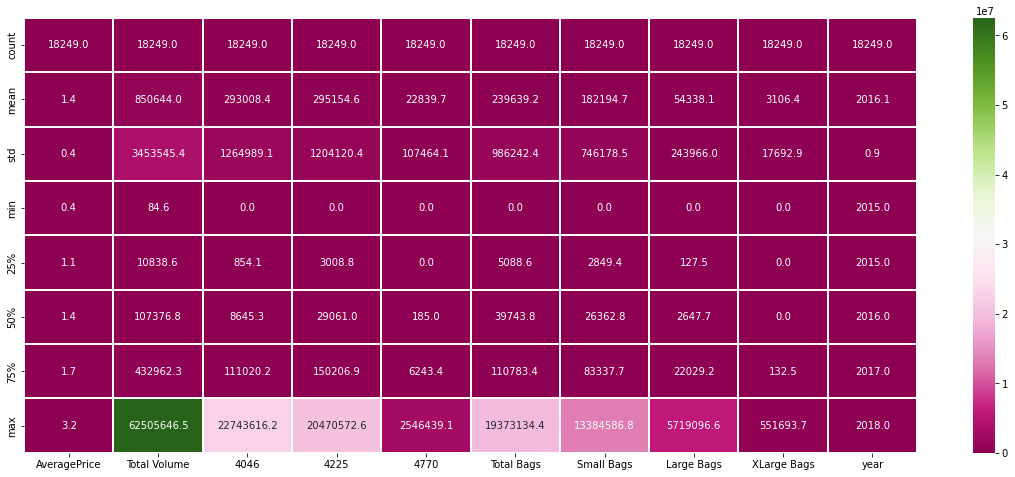

In [18]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(20,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


In [24]:
df.describe(include = object)

,type,region
count,18249,18249
unique,2,54
top,conventional,Albany
freq,9126,338


In [26]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

- In the initial analysis, Seems Most of features are having outliers by looking at the max data
- Also some skewness - mostly right skewed - Mean are greater than median
- Min value zero for most of the features
- Std value is more than Mean for most of the features
- Object feature - Type are of two type- Conventional and Organic
- Region has 54 unique values

In [21]:
#Lets Check the price feature first

print('Minimum Price of Avocado :',df.AveragePrice.min())
print('Maximum Price of avacado :',df.AveragePrice.max(),)
print('Average Price of avacado :',df.AveragePrice.mean())

Minimum Price of Avocado : 0.44
Maximum Price of avacado : 3.25
Average Price of avacado : 1.4059784097758825


Avocado price varies from 0.44 usd to 3.25 usd

<AxesSubplot:title={'center':'Distribution Price'}, xlabel='AveragePrice', ylabel='Density'>

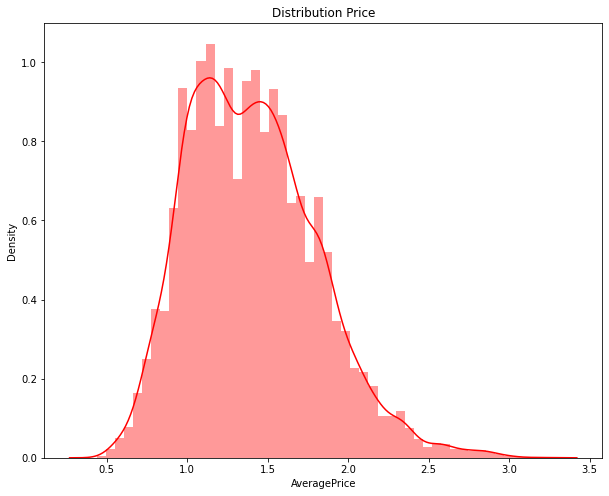

In [27]:
plt.figure(figsize=(10,8))
plt.title('Distribution Price')
sns.distplot(df["AveragePrice"], color='r')

Average price of Avacado varies between 1.1 and 1.6 USD/unit in most cases

In [28]:
# Checking the value count of type

df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [29]:
df.groupby('type')['AveragePrice'].mean()

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

In [30]:
print("\033[1m"+'Percentage difference in price of avacado :'+"\033[0m",((1.65399-1.1580)/1.1580)*100,"%")

Percentage difference in price of avacado : 42.831606217616596 %


<AxesSubplot:xlabel='AveragePrice', ylabel='type'>

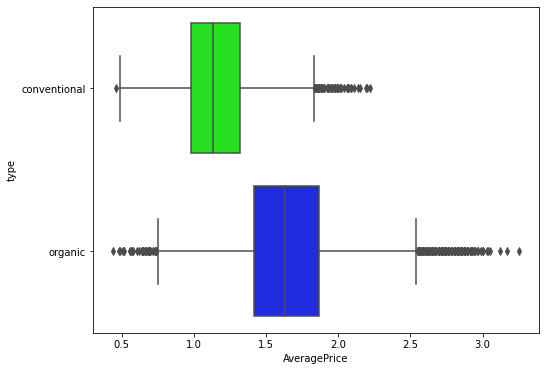

In [31]:
plt.figure(figsize=(8,6))
sns.boxplot(y="type", x="AveragePrice", data=df, palette = 'hsv')

- Organic avocado is costlier the normal avocado


##### Avocado Type distribution  Plot using pie plot

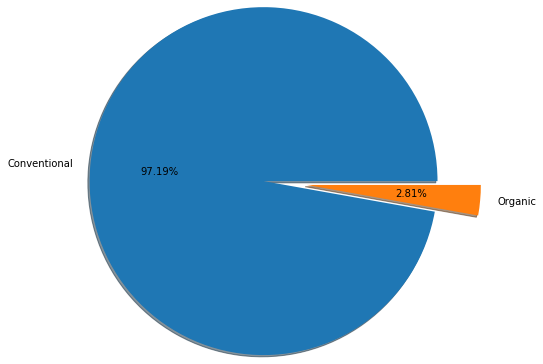

In [33]:
labels = 'Conventional','Organic',
fig, ax = plt.subplots()
ax.pie(df.groupby('type')['Total Volume'].mean(),labels = labels,radius =2,autopct = '%2.2f%%',explode=[0.3,0.2], shadow=True,)
plt.show()

In [34]:
df.groupby('type')['Total Volume'].mean()

type
conventional    1.653213e+06
organic         4.781121e+04
Name: Total Volume, dtype: float64

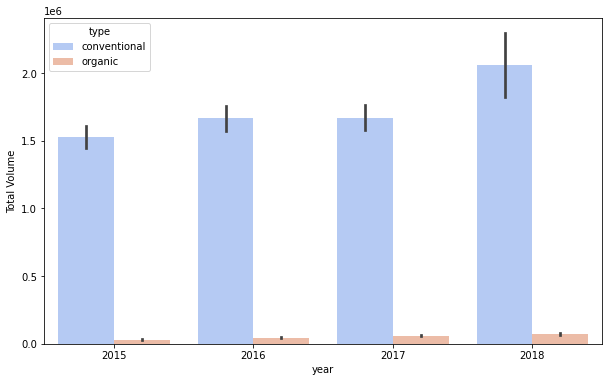

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(x='year', y='Total Volume', hue='type',data=df, palette='coolwarm',ci=68)
plt.show()

- Organic avocado demand/sale is of nominal percentage
- Also Conventional are more in demand

##### Price Comparison

In [36]:
pd.crosstab([df.type,df.year],df.AveragePrice, margins= True).style.background_gradient(cmap='summer_r')

In [37]:
df.groupby(['year','type'])['AveragePrice'].agg([min,max,np.mean,np.median])

min   max      mean  median
year type                                      
2015 conventional  0.49  1.59  1.077963    1.08
     organic       0.81  2.79  1.673324    1.67
2016 conventional  0.51  2.20  1.105595    1.08
     organic       0.58  3.25  1.571684    1.53
2017 conventional  0.46  2.22  1.294888    1.30
     organic       0.44  3.17  1.735521    1.72
2018 conventional  0.56  1.74  1.127886    1.14
     organic       1.01  2.30  1.567176    1.55

- On each of time frame (Year) Organic Avocado are costlier than Conventional Avocados
- A slight price hike for avacado reported on 2017

###### Demand Comparison

In [38]:
df.groupby(['year','type'])['Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags'].agg([sum])

Total Volume    Total Bags    Small Bags    Large Bags  \
                            sum           sum           sum           sum   
year type                                                                   
2015 conventional  4.296599e+09  7.481009e+08  6.194886e+08  1.231692e+08   
     organic       8.886943e+07  2.409134e+07  1.519414e+07  8.897192e+06   
2016 conventional  4.690250e+09  1.398101e+09  1.064426e+09  3.136371e+08   
     organic       1.306401e+08  6.505765e+07  4.206845e+07  2.298920e+07   
2017 conventional  4.766166e+09  1.541193e+09  1.145835e+09  3.713655e+08   
     organic       1.681399e+08  1.050962e+08  7.711715e+07  2.797352e+07   
2018 conventional  1.334206e+09  4.593696e+08  3.344334e+08  1.177311e+08   
     organic       4.853227e+07  3.216630e+07  2.630799e+07  5.852903e+06   

                   XLarge Bags  
                           sum  
year type                       
2015 conventional   5443128.28  
     organic              0.00  
2016 conventional  20038284.84  
     organic              0.00  
2017 conventional  23991658.41  
     organic           5513.93  
2018 conventional   7205184.07  
     organic           5407.80

- Demand for avovcados are more for the year 2017, sales and demand also increased
- Demand is more for conventional type over Organic
- Customer prefers small box of avocado over big bags

In [39]:
df.sort_values(by=['Date'], inplace=True, ascending=True)

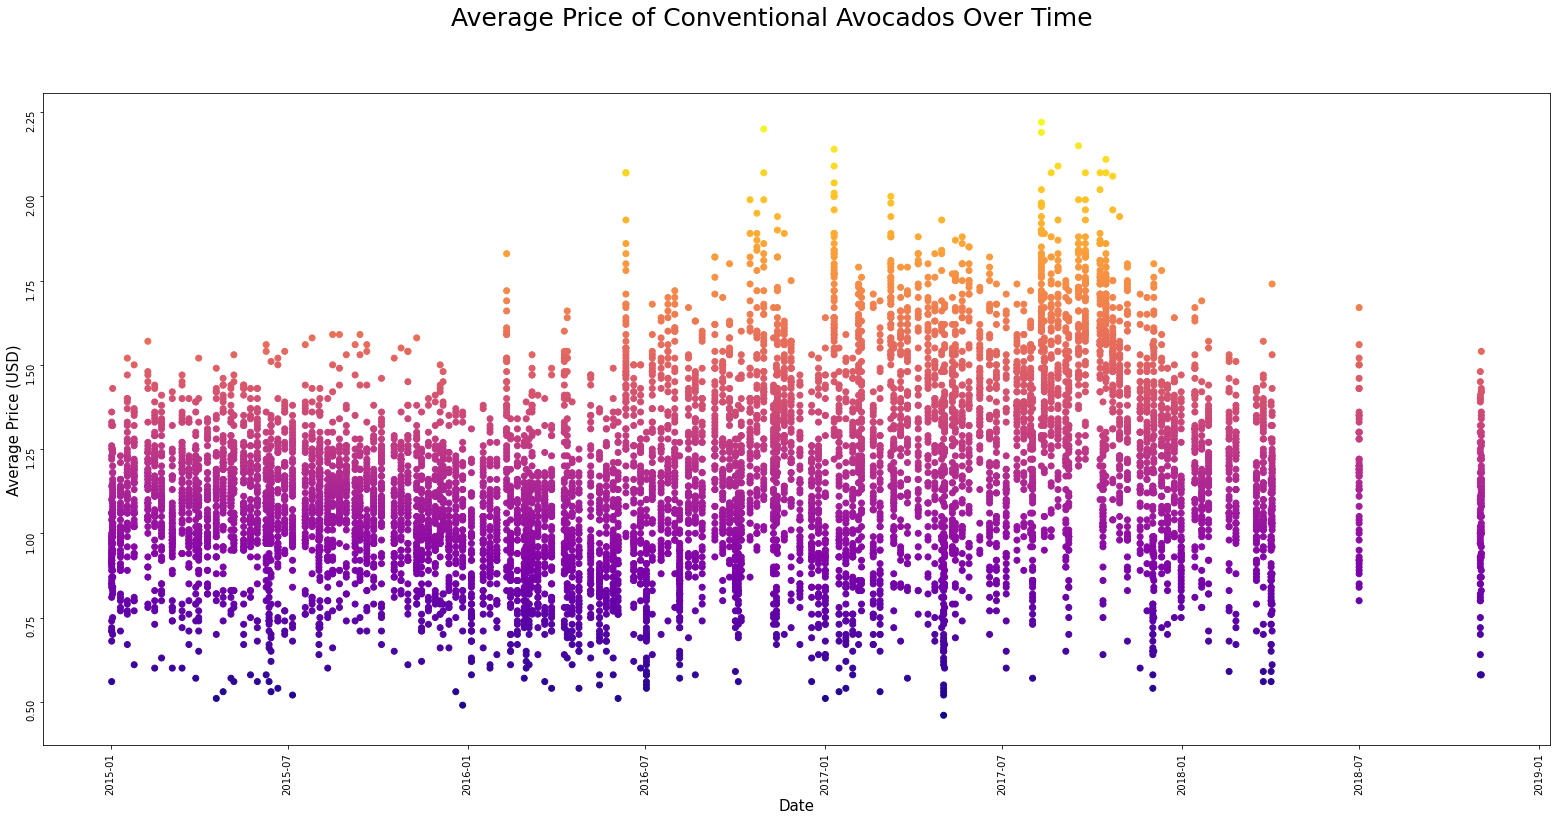

In [40]:
# Average price of Conventional Avocados over time

mk = df['type']== 'conventional'
plt.rc('figure', titlesize=20)
fig = plt.figure(figsize = (27, 12))
fig.suptitle('Average Price of Conventional Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)

dates = df[mk]['Date'].tolist()
avgPrices = df[mk]['AveragePrice'].tolist()

plt.scatter( dates,avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15,)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
ax.set_xlim()
ax.tick_params(labelrotation=90)

plt.show()

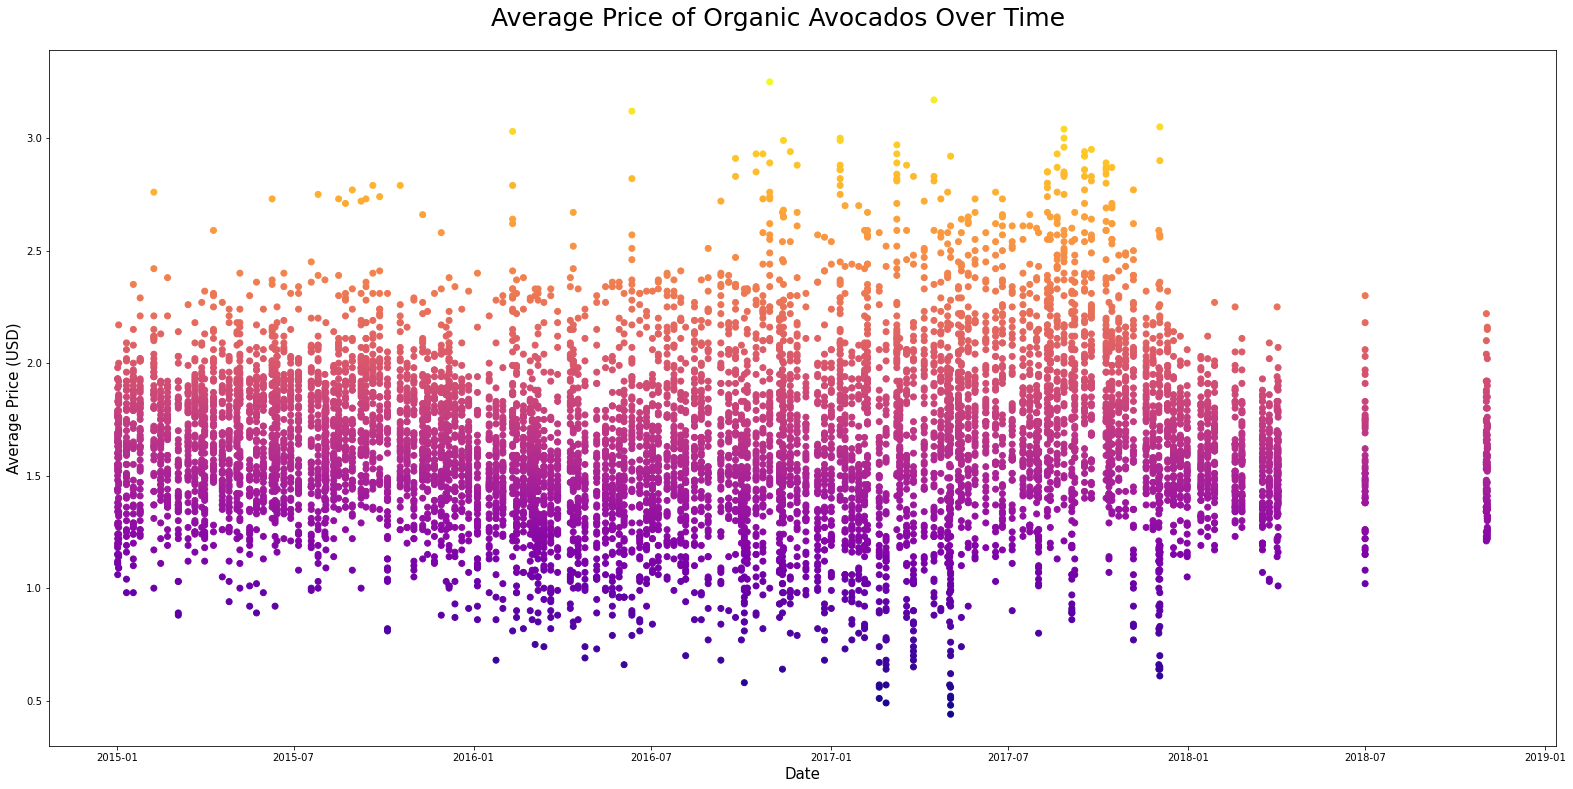

In [41]:
# Average price of Organic Avocados over time
mk = df['type']== 'organic'
plt.rc('figure', titlesize=20)
fig = plt.figure(figsize = (27, 12))
fig.suptitle('Average Price of Organic Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.93)

dates = df[mk]['Date'].tolist()
avgPrices = df[mk]['AveragePrice'].tolist()

plt.scatter(dates,avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
plt.xlim()
plt.show()

In [42]:
df.groupby(['region'])['Total Volume','AveragePrice'].agg([sum])

,Total Volume,AveragePrice
,sum,sum
region,,
Albany,1.606780e+07,527.63
Atlanta,8.860512e+07,452.23
BaltimoreWashington,1.347139e+08,518.57
Boise,1.441319e+07,455.67
Boston,9.727398e+07,517.44
BuffaloRochester,2.296247e+07,512.69
California,1.028982e+09,471.62
Charlotte,3.555554e+07,542.84


#### Exploratory Data Analysis

In [43]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9537,2015-01-02,1.93,3557.34,210.49,1244.18,1457.98,644.69,644.69,0.00,0.00,organic,2015,Charlotte
723,2015-01-02,0.92,539750.77,205775.28,136119.82,127173.89,70681.78,54003.36,688.47,15989.95,conventional,2015,Detroit
9901,2015-01-02,1.98,769.05,52.14,620.24,0.00,96.67,96.67,0.00,0.00,organic,2015,GrandRapids
9745,2015-01-02,1.24,12276.58,6669.52,1653.73,0.00,3953.33,3953.33,0.00,0.00,organic,2015,DallasFtWorth
10941,2015-01-02,1.77,1427.11,760.33,74.32,0.00,592.46,585.38,7.08,0.00,organic,2015,Pittsburgh


In [44]:
# Datframe for numeric features
df2 = df2=df.copy()

In [45]:

df2.drop(['Date','type','region','year'], axis=1, inplace=True)

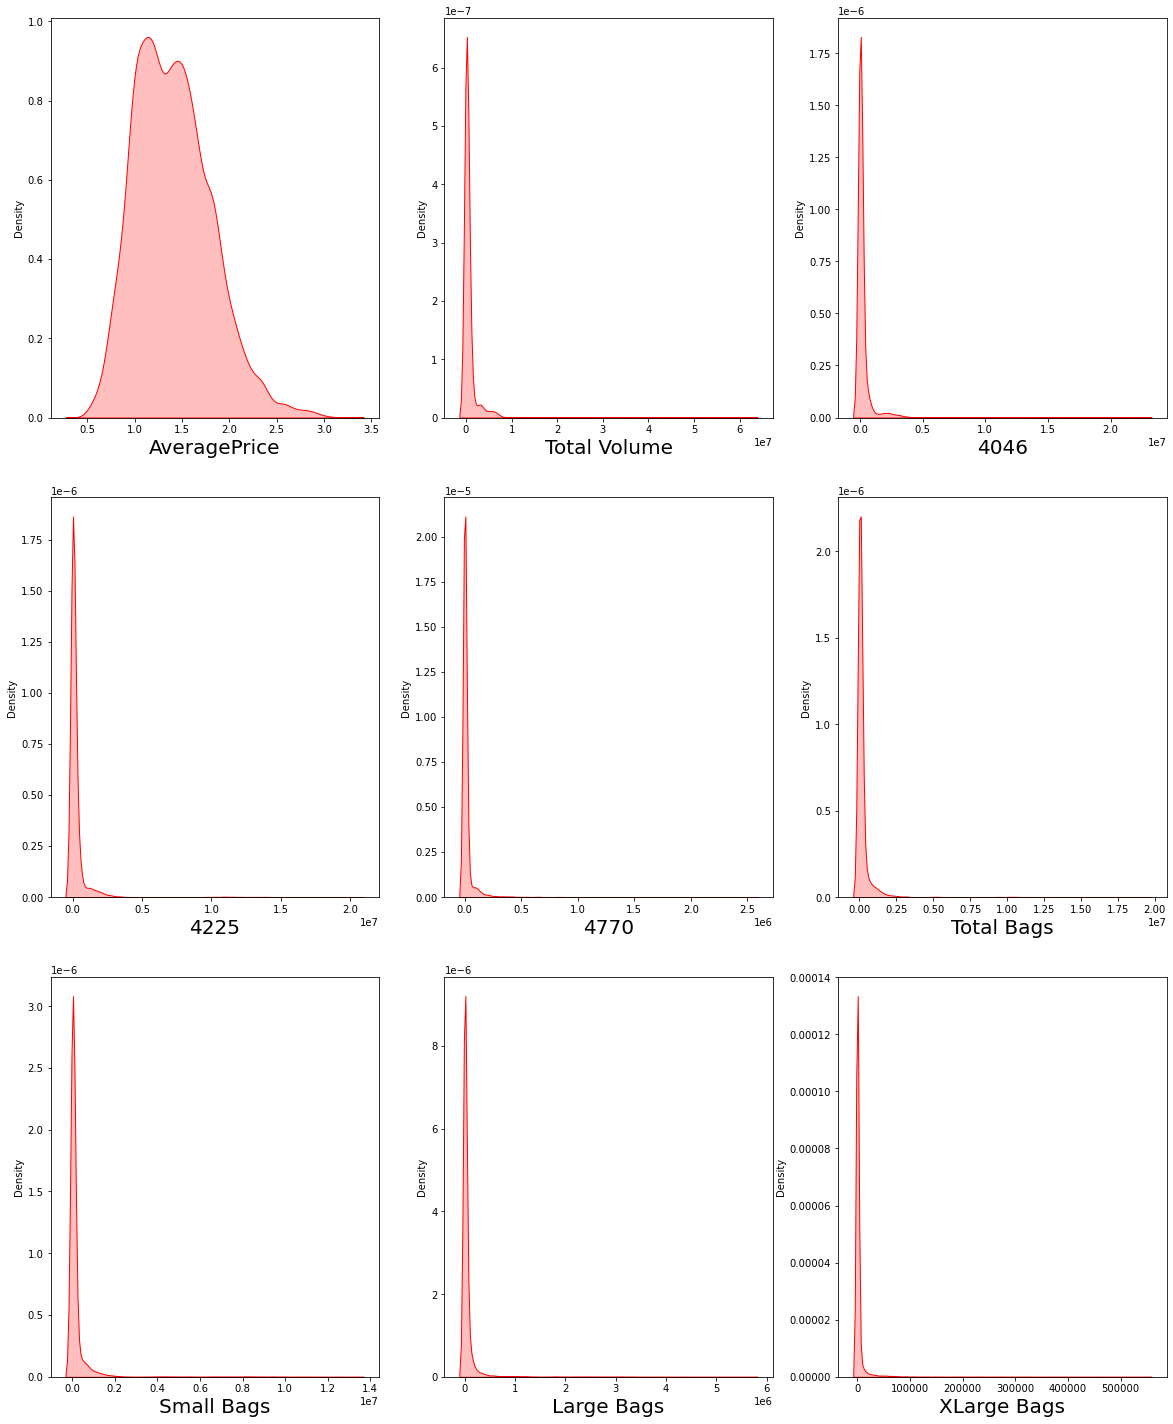

In [46]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in df2:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df2[column], color='r',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

- Sharp peaks and right skewed data 
- Expecting more outliers

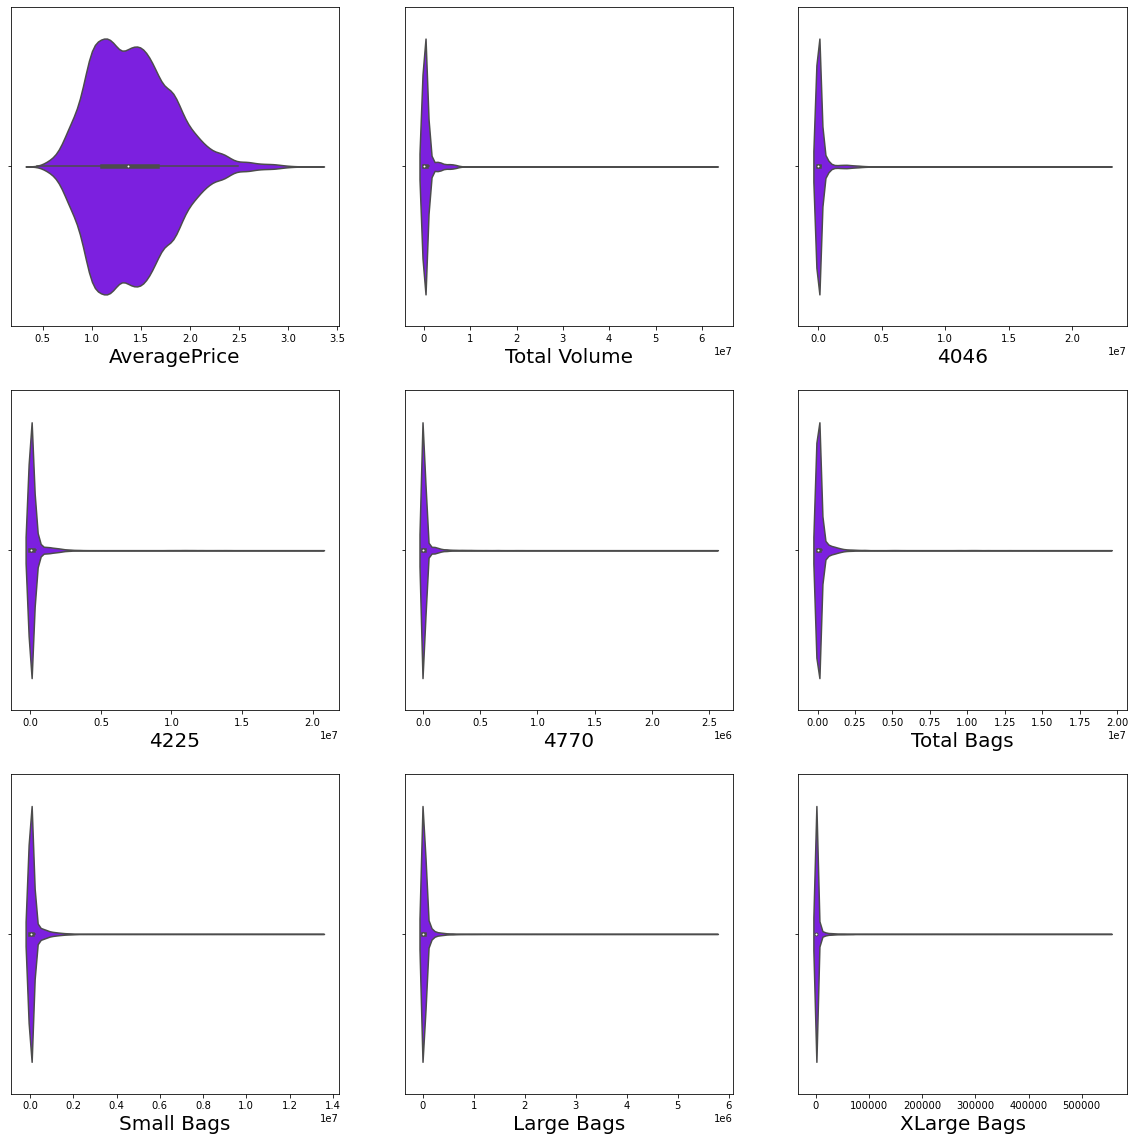

In [47]:
# Violin plot


sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20), facecolor='white')
plotnumber =1
for column in df2:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.violinplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

- NO major Observation felt violin plot other than dist plot, lets prpoced further

- We found out the fruit price varies over time (may be seasonal changes), lets check this

In [85]:
# Copy taken for price analysis
# re imnporting the df as group by reset the index
#importing the Avocado dataset
df = pd.read_csv(r'C:\Users\sajad\Downloads\avocado.csv\avocado.csv')

In [86]:
# Copy of original dataframe
df3=df.copy()
df3.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [87]:
df3['Day'], df3['Month'], df3['Year'] = df3['Date'].str.split('/').str
df3.drop(columns=['Date','year'], inplace=True)
df3

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Day,Month,Year
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,27,12,2015
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,20,12,2015
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,13,12,2015
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,06,12,2015
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,29,11,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,04,02,2018
18245,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,28,01,2018
18246,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,21,01,2018
18247,10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,14,01,2018


In [88]:
# Converting Datetime datatypes to int
df3['Year']=df3['Year'].astype(int)
df3['Month']=df3['Month'].astype(int)
df3['Date']=df3['Day'].astype(int)

In [89]:
df3.drop(columns=['Day'],axis=1, inplace=True)

In [90]:
df3.drop(columns=['Date'],axis=1, inplace=True)

In [91]:
df3.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Month,Year
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,12,2015
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,12,2015
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,12,2015
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,12,2015
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,11,2015


#### Univariate Analysis



In [92]:
# Checking unique values and Yearwise total No of sale entry
df3['Year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='count'>

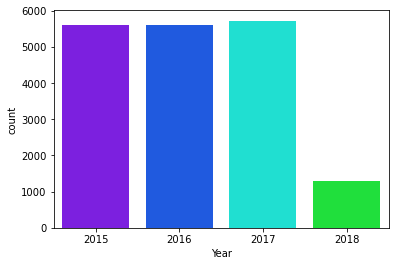

In [93]:
sns.countplot('Year',data=df3)

- max sales happend at 2017 and the least happened at 2018

- We need to chek the Monthly price Average price
- sales per month
- check for anyt relationship between average price and sales

Max Count 1944
Min Count 1294


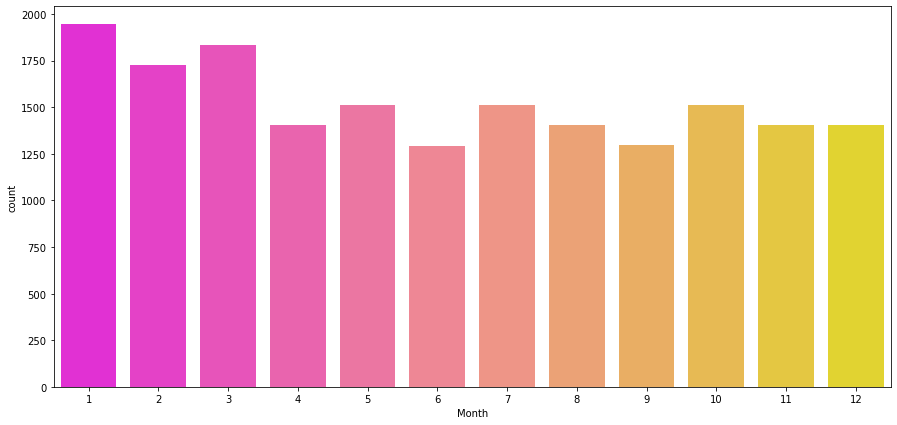

In [96]:
plt.figure(figsize=(15,7))
sns.countplot(x='Month', data=df3, palette="spring")

print('Max Count',df3['Month'].value_counts().max())
print('Min Count',df3['Month'].value_counts().min())

Max sale happend at January, and minimum sale on June, 
Jan, Feb, and March are the seasons

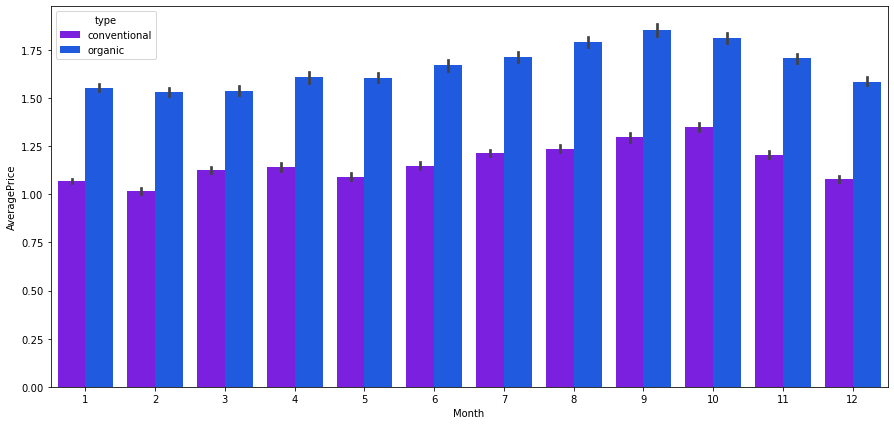

In [97]:
    ##### Month Wise Average sales
    
    plt.figure(figsize=(15,7))
    sns.barplot(x="Month", y="AveragePrice", hue='type', data=df3)
    plt.show()

In [100]:
df3.groupby(['Month','type'])['AveragePrice'].agg([np.mean])

mean
Month type                  
1     conventional  1.069095
      organic       1.552942
2     conventional  1.017315
      organic       1.531458
3     conventional  1.126209
      organic       1.538301
4     conventional  1.142350
      organic       1.606410
5     conventional  1.089577
      organic       1.603624
6     conventional  1.149198
      organic       1.669536
7     conventional  1.212487
      organic       1.711667
8     conventional  1.235399
      organic       1.789630
9     conventional  1.294738
      organic       1.850571
10    conventional  1.349339
      organic       1.810026
11    conventional  1.206054
      organic       1.705071
12    conventional  1.077393
      organic       1.585193

<Figure size 720x720 with 0 Axes>

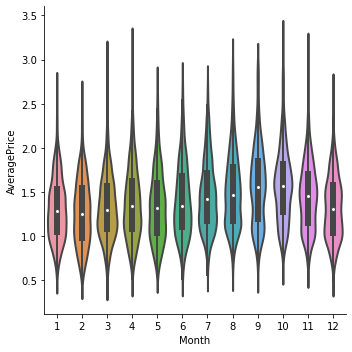

In [99]:
plt.figure(figsize=(10,10))
sns.catplot(x = "Month", y = "AveragePrice", kind ='violin', data=df3, linewidth=2)
plt.show()

- For the month of Sept and October Conventional Avocado price is higher

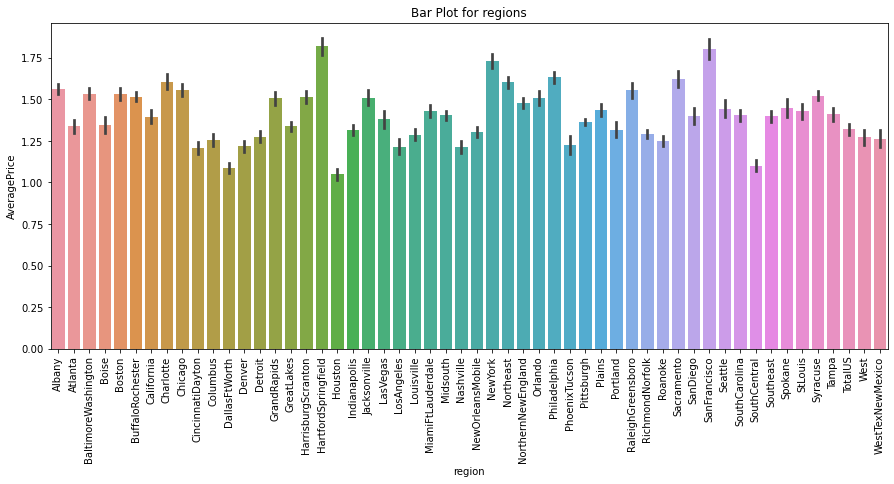

In [101]:
# Region and Price Comparison

plt.figure(figsize=(15,6))
sns.barplot(x=df['region'],y=df['AveragePrice'], data=df3)
plt.title(f'Bar Plot for regions')
plt.xticks(rotation=90)
plt.show()

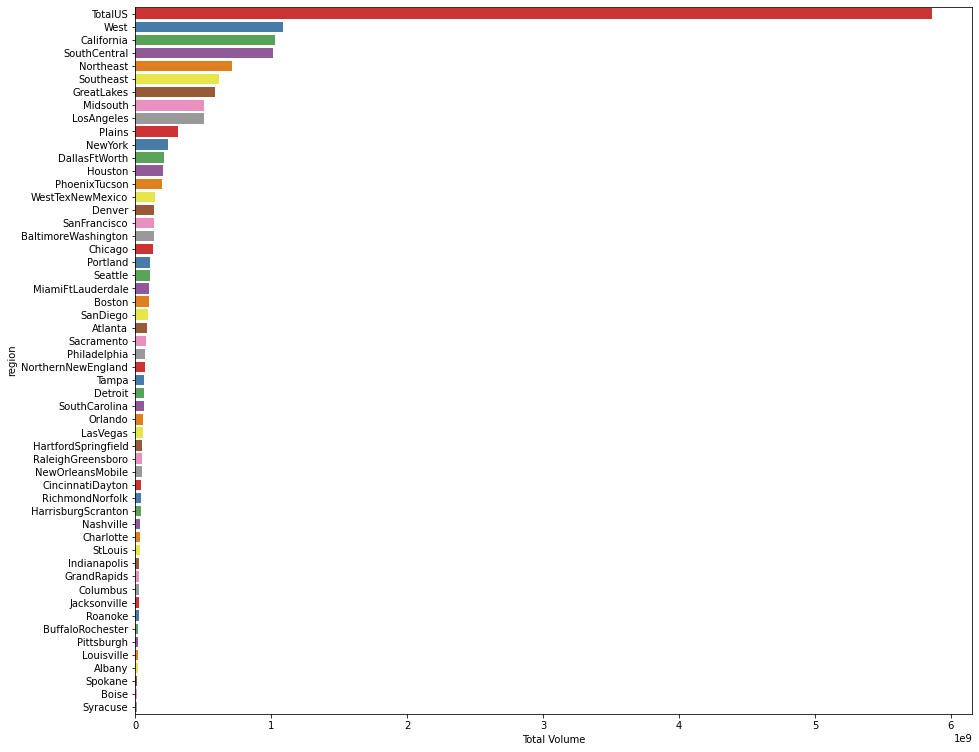

In [102]:
region = df.groupby('region')['Total Volume'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,13))
sns.barplot(x=region["Total Volume"], y=region["region"], data=df, palette="Set1")
plt.show()

In [103]:
df.groupby(['region'])['Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags'].agg([np.mean])

,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags
,mean,mean,mean,mean,mean
region,,,,,
Albany,4.753787e+04,7.929747e+03,6.647765e+03,1.153496e+03,128.488639
Atlanta,2.621453e+05,8.449856e+04,5.160573e+04,3.207004e+04,822.786036
BaltimoreWashington,3.985619e+05,1.044561e+05,1.009397e+05,2.903985e+03,612.382722
Boise,4.264257e+04,1.597459e+04,1.384004e+04,2.103634e+03,30.915207
Boston,2.877929e+05,6.359609e+04,5.890659e+04,4.438365e+03,251.124231
BuffaloRochester,6.793630e+04,3.435134e+04,3.037998e+04,3.729050e+03,242.313432
California,3.044324e+06,7.298290e+05,6.778038e+05,3.642585e+04,15599.342929
Charlotte,1.051939e+05,3.460930e+04,3.149069e+04,2.912684e+03,205.927781


- Max sales Volume is in South Central & Min Sales Volume is in Syracuse.
- Max Average Price is in SanFrancisco & Min Average Sale price is in Houston.

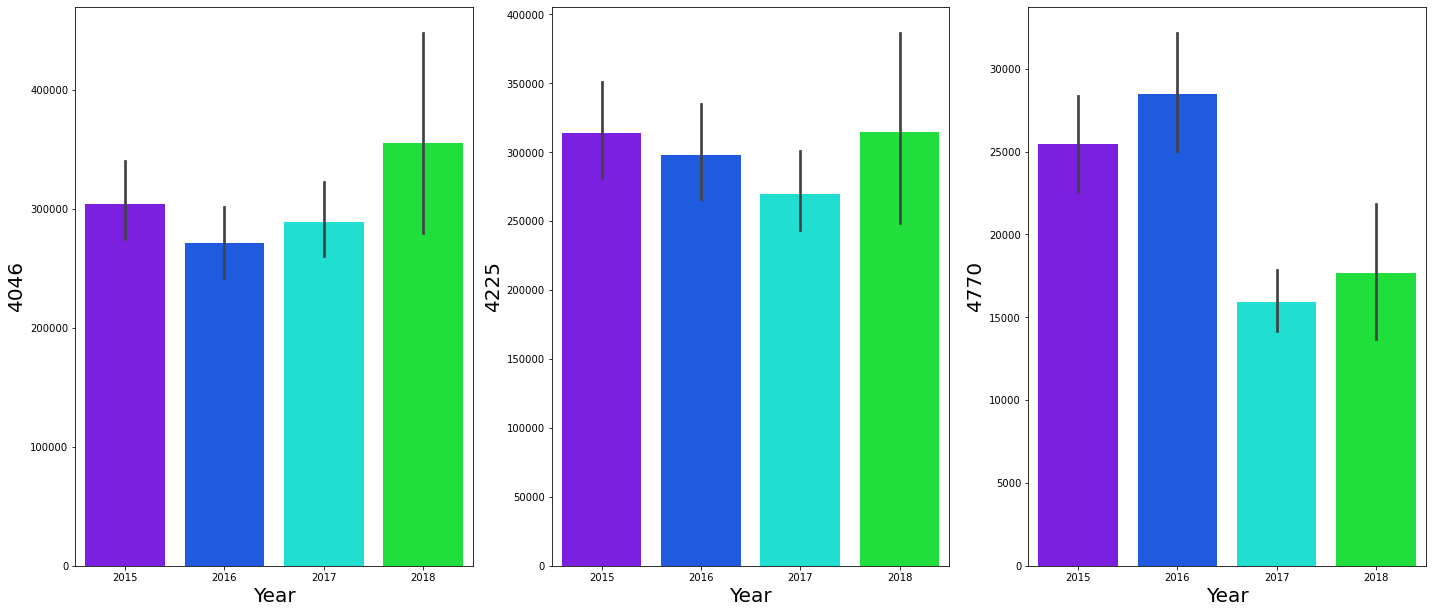

In [104]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
y = df[['4046','4225','4770']]
X = df['year']
for col in y:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.barplot(X,y[col])
        plt.xlabel('Year',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Production of PLU 4046 has grown over the 4 years and is greater than the production of PLU 4225 and  PLU 4770, is least produced.

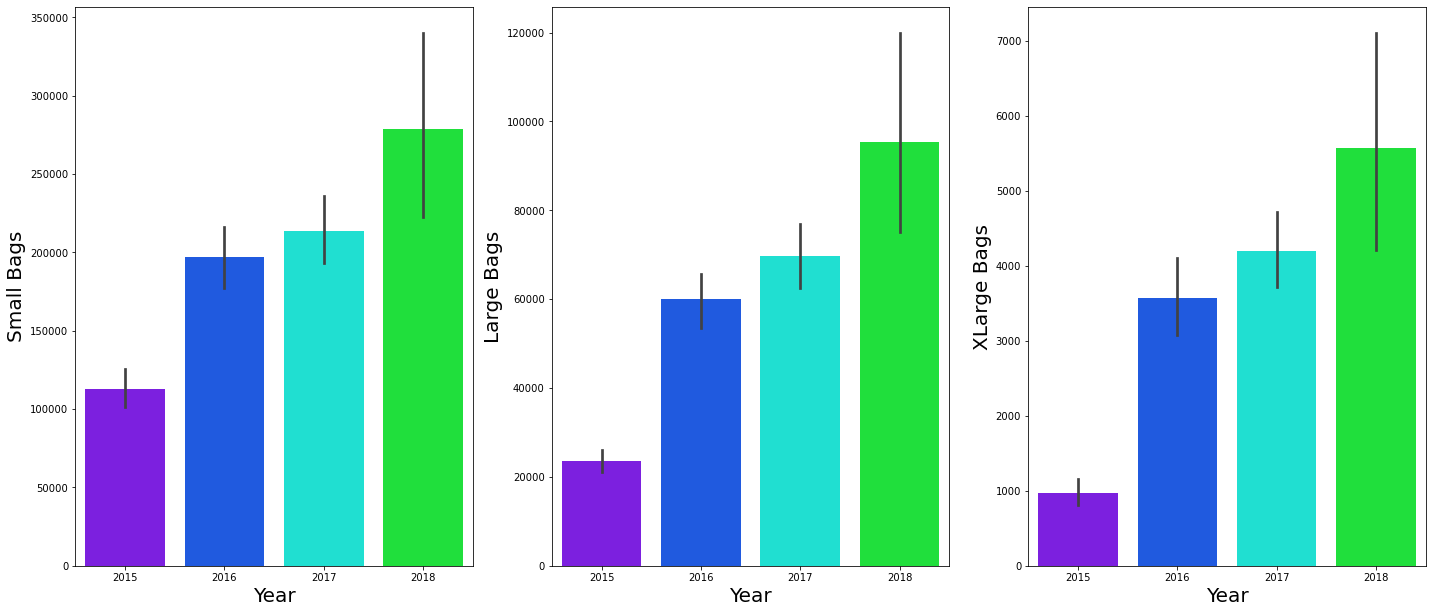

In [105]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
y = df[['Small Bags','Large Bags','XLarge Bags']]
X = df['year']
for col in y:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.barplot(X,y[col])
        plt.xlabel('Year',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Sale of all 3 types of bags has grown over the years.
Most of customers prefer buying Small Bags over Large and Xlarge bags.
There is very narrow Customer segment willing to buy XLarge type bags possiblily more quantity need to consume and price associated with it.

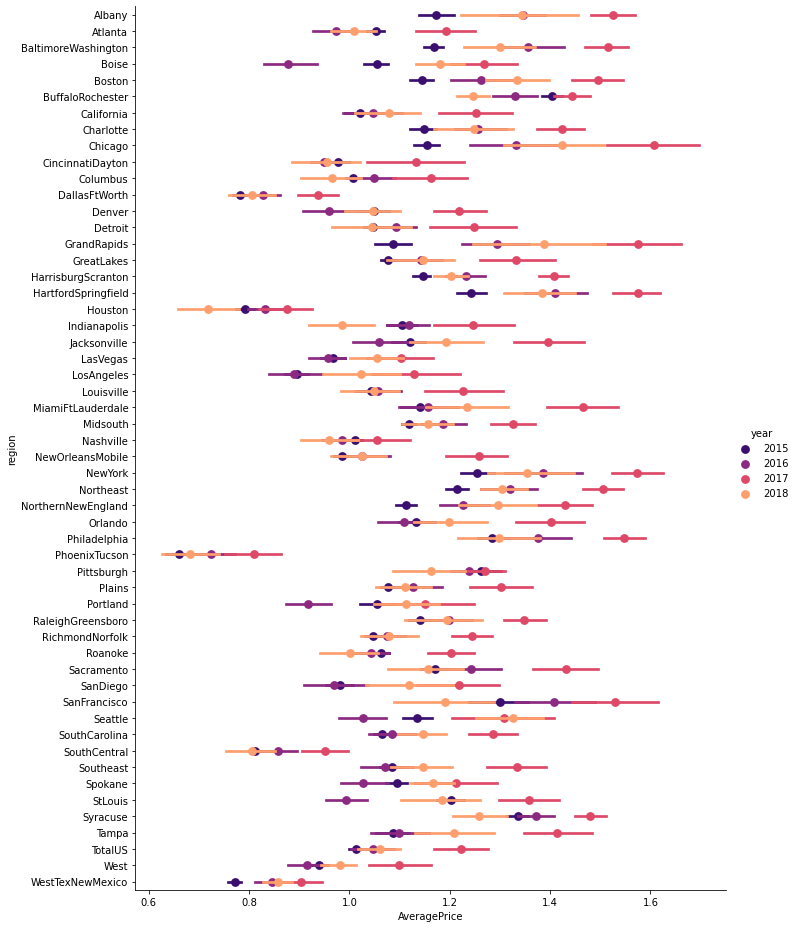

In [106]:
mask = df['type']=='conventional'
g = sns.factorplot('AveragePrice','region',data=df[mask],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

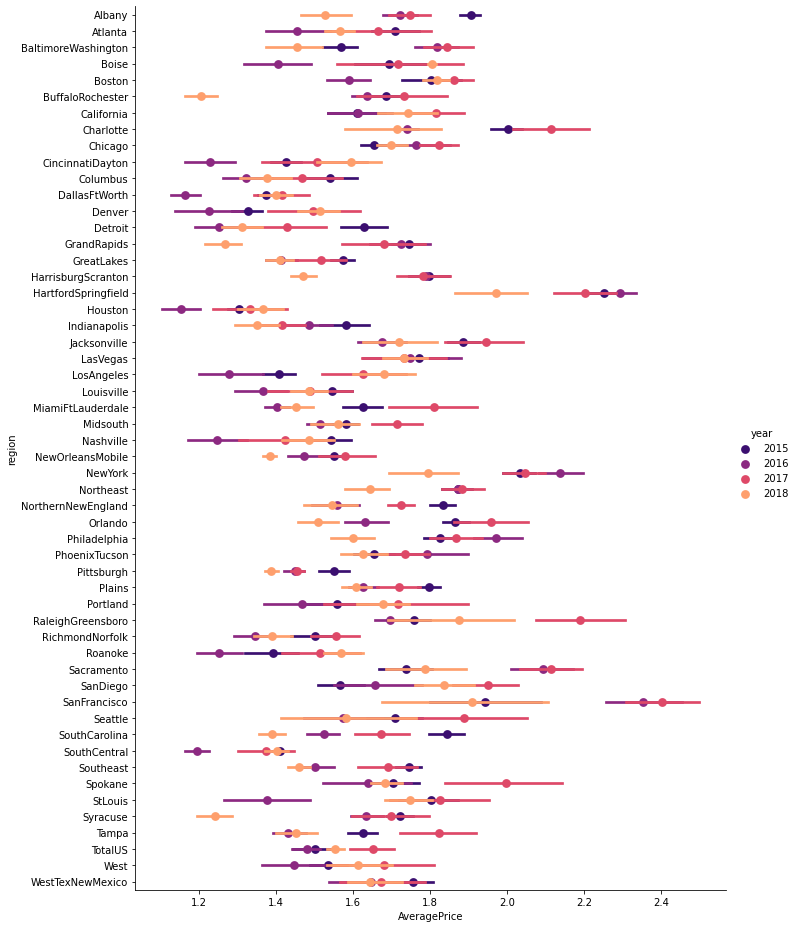

In [108]:
mask = df['type']=='organic'
g = sns.factorplot('AveragePrice','region',data=df[mask],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

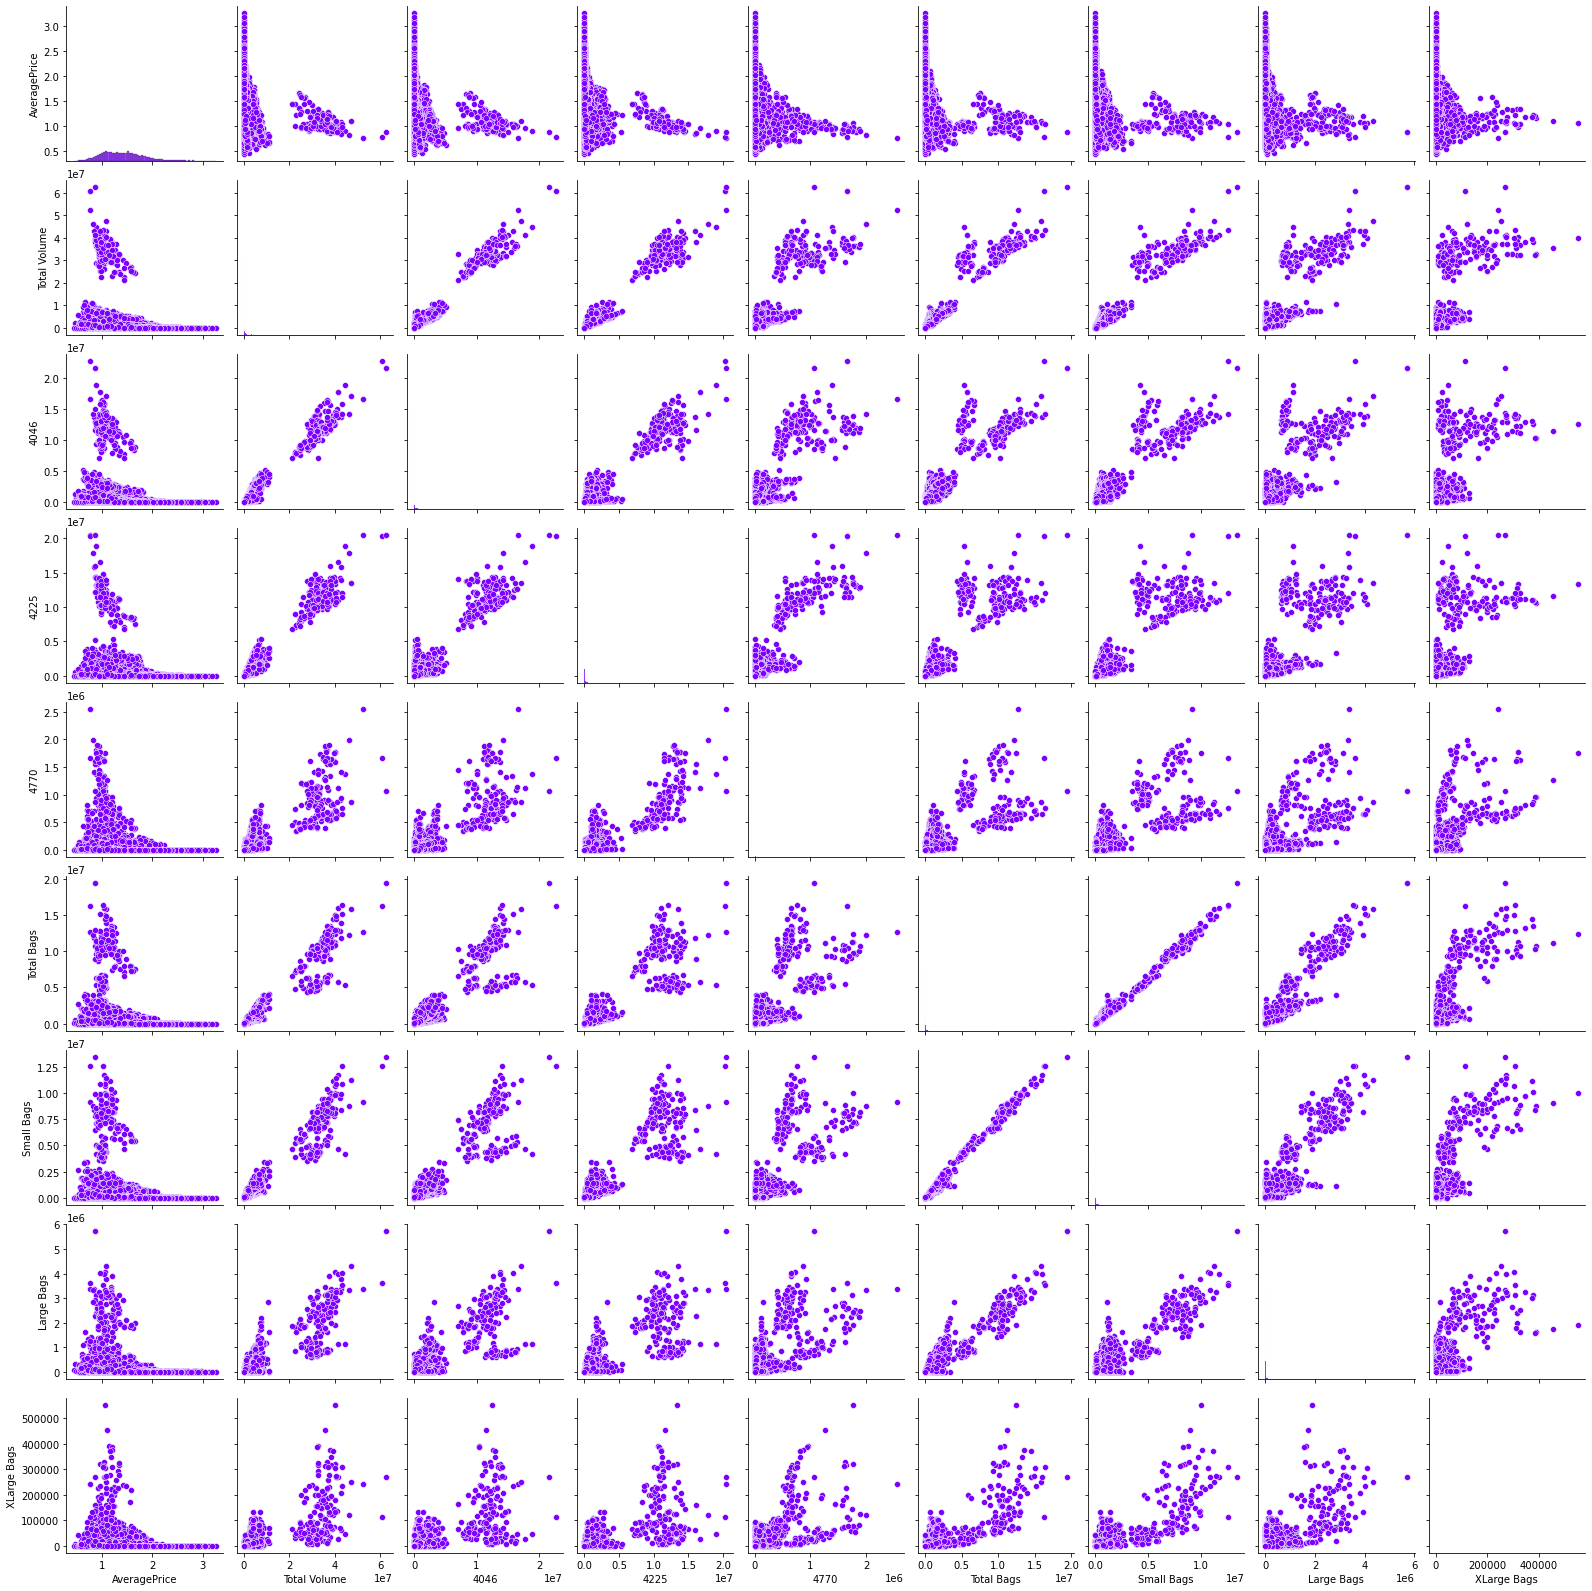

In [109]:
sns.pairplot(df2)

#### Encoding of categorical Data

In [110]:
# Using Label Encoder on target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df3['region']=le.fit_transform(df3['region'])
df3['type']=le.fit_transform(df3['type'])
df3.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Month,Year
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,12,2015
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,12,2015
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,12,2015
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,12,2015
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,11,2015


#### Outliers Detection and Removal

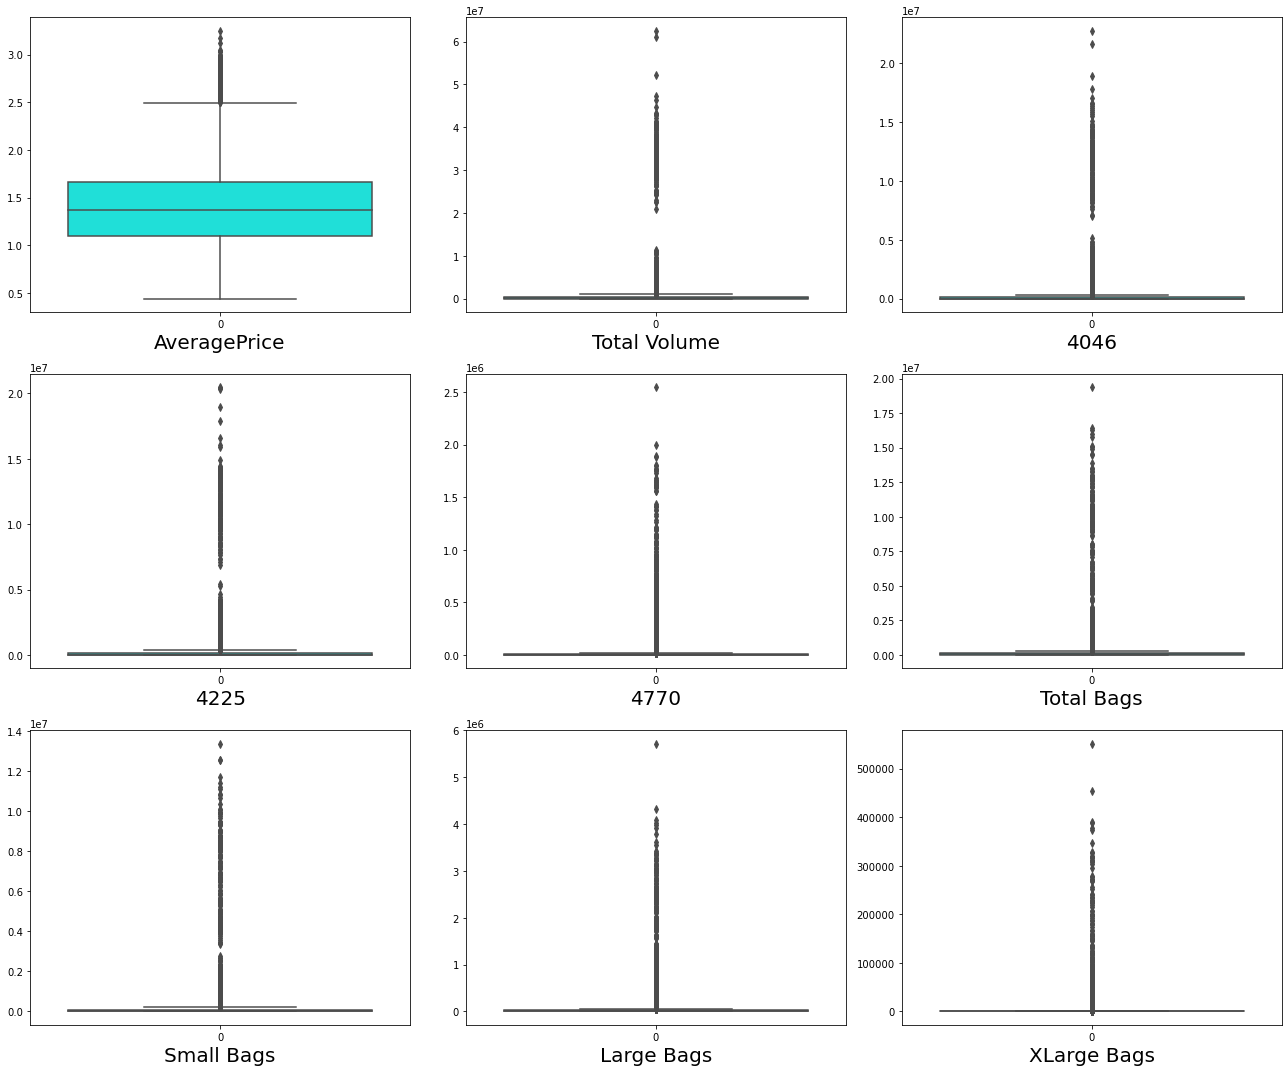

In [113]:
plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in df2:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(data = df2[column], palette='hsv')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

- Lots of outliers, need outliers to be treated
- We need to use Transformation technique for outliers removal - Z transform

In [114]:
from scipy.stats import zscore
z = np.abs(zscore(df3))
threshold = 3
df4 = df3[(z<3).all(axis = 1)]

In [116]:
print('Shape of dataset after removing outliers :',df4.shape)

Shape of dataset after removing outliers : (17651, 14)


In [117]:
print('Percentage Data Loss :',((18249-17651)/18249)*100,'%')

Percentage Data Loss : 3.276891884486821 %


Data Loss is less than 10%, Acceptable data loss

In [118]:
##### Correlation check

df4.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Month,Year
Unnamed: 0,1.000000,-0.126781,0.017336,0.019337,0.029467,0.052711,-0.016020,-0.011083,-0.026140,-0.012751,0.004325,-0.001651,-0.780789,-0.170651
AveragePrice,-0.126781,1.000000,-0.332056,-0.333577,-0.243988,-0.243465,-0.297323,-0.275771,-0.270915,-0.152669,0.613150,-0.003242,0.149502,0.091704
Total Volume,0.017336,-0.332056,1.000000,0.876307,0.871592,0.647518,0.912184,0.905648,0.640642,0.513741,-0.415476,0.076676,-0.018645,-0.004866
4046,0.019337,-0.333577,0.876307,1.000000,0.565118,0.492127,0.727981,0.706800,0.561060,0.415432,-0.341376,0.119067,-0.015797,-0.034636
4225,0.029467,-0.243988,0.871592,0.565118,1.000000,0.620221,0.757786,0.778761,0.451711,0.392030,-0.383138,0.011002,-0.019844,-0.040234
4770,0.052711,-0.243465,0.647518,0.492127,0.620221,1.000000,0.557980,0.571512,0.323747,0.495976,-0.321809,-0.095972,-0.027245,-0.082054
Total Bags,-0.016020,-0.297323,0.912184,0.727981,0.757786,0.557980,1.000000,0.978213,0.746946,0.581690,-0.378205,0.085892,-0.010916,0.103442
Small Bags,-0.011083,-0.275771,0.905648,0.706800,0.778761,0.571512,0.978213,1.000000,0.593155,0.597700,-0.367593,0.065976,-0.013018,0.086639
Large Bags,-0.026140,-0.270915,0.640642,0.561060,0.451711,0.323747,0.746946,0.593155,1.000000,0.296864,-0.286813,0.127635,-0.001457,0.119543
XLarge Bags,-0.012751,-0.152669,0.513741,0.415432,0.392030,0.495976,0.581690,0.597700,0.296864,1.000000,-0.263734,-0.044338,0.002843,0.108209


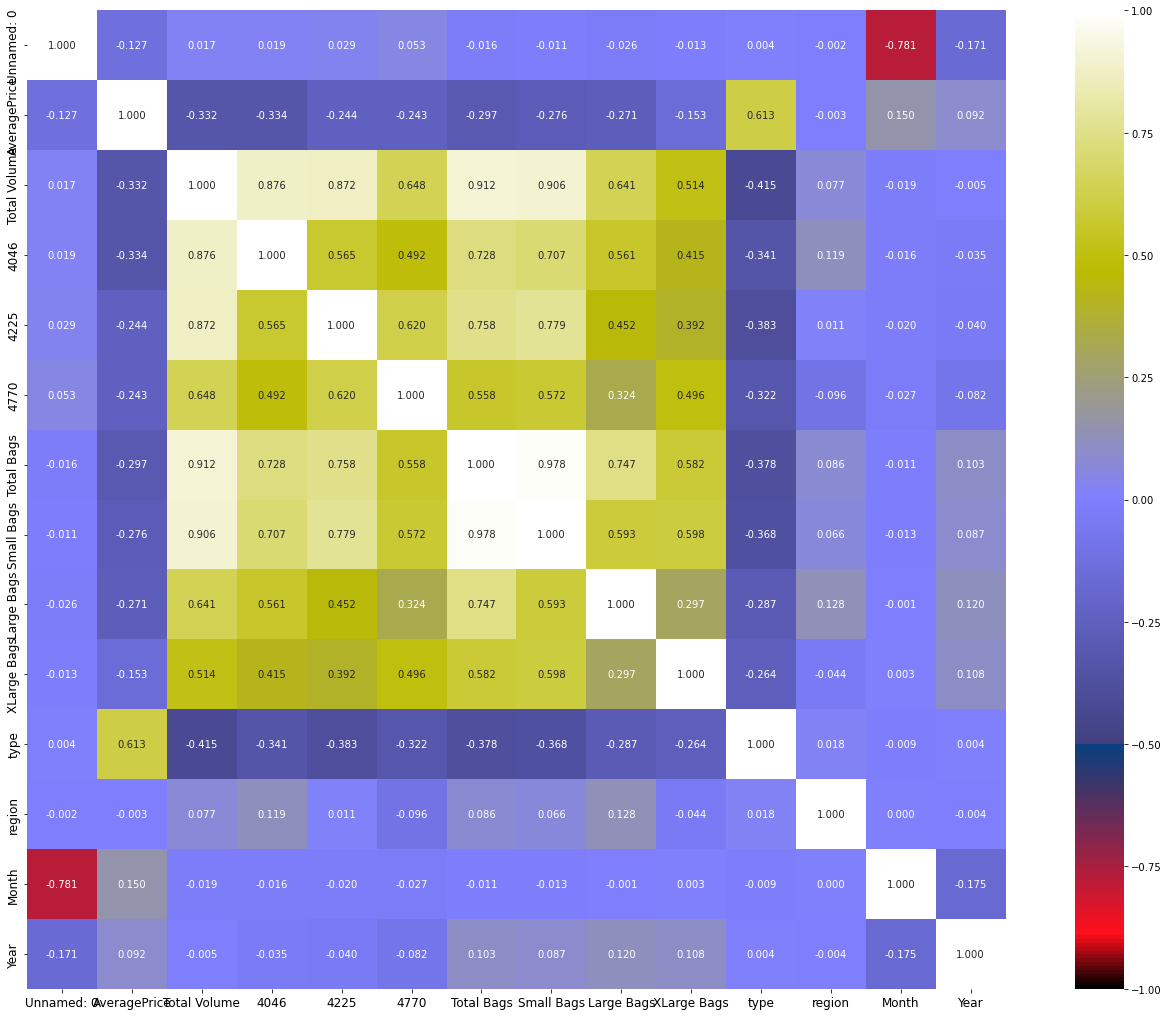

In [119]:
# Heat map Check 

plt.figure(figsize=(25,18))
sns.heatmap(df4.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

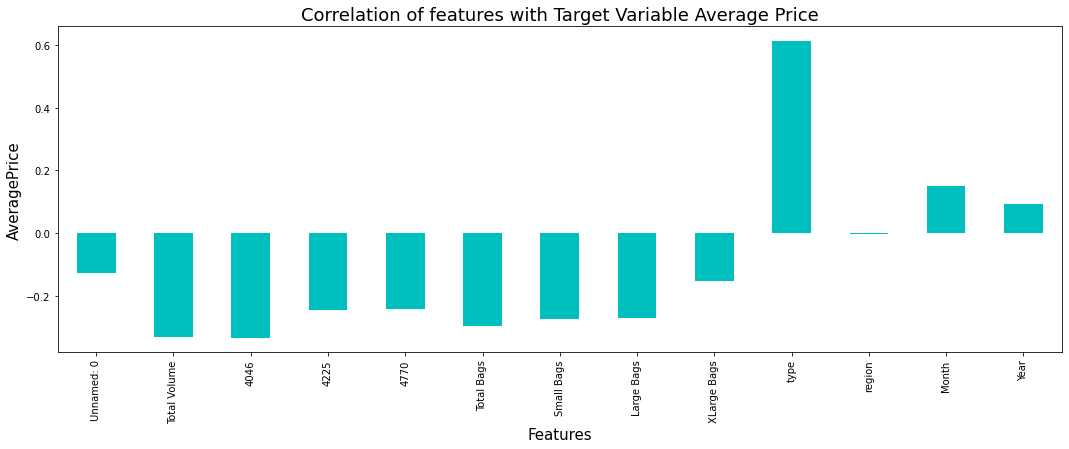

In [120]:
#Correlation bar plot
plt.figure(figsize = (18,6))
df4.corr()['AveragePrice'].drop(['AveragePrice']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('AveragePrice',fontsize=15)
plt.title('Correlation of features with Target Variable Average Price',fontsize = 18)
plt.show()

Al most all features are highly correlatd with the target variable 

Small bags are highly correlated with Total Bags correlation coeffient 0.978. It is natural as most of bags are small.
Total volume is highly correleated 4046.

Removal of multicileniar features and poorly correlated features 

- 4046,4225,4770 are shows multicollinearity with Total Volume.
- Total bags. Total bags is sum of all other type of bags
- region feature,  droppijng this as it very poorly correlated with other features

In [121]:
df4.drop(columns=['4046','4225','4770','region','Total Bags'],axis=1, inplace=True)

##### Multicollinearity between features using variance_inflation_factor

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df4.values,i) for i in range(df4.shape[1])]
vif['Features']= df4.columns
vif

,VIF,Features
0,8.915814,Unnamed: 0
1,24.373378,AveragePrice
2,7.822771,Total Volume
3,7.761301,Small Bags
4,1.977068,Large Bags
5,1.693554,XLarge Bags
6,3.643827,type
7,10.536329,Month
8,42.665915,Year


Dropping featurwes are not advisable here as almost all of the features are correlated with each other 

So we needs Multicollinerity is to Scaled Data and then apply PCA.

In [124]:
df4.drop(columns=['Year'],axis=1, inplace=True)

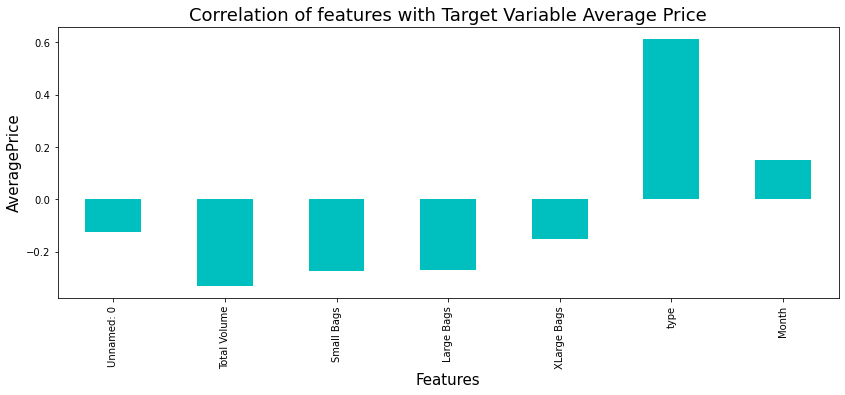

In [126]:

#Checking correlation with target variable after removal of multicollinearity

plt.figure(figsize = (14,5))
df4.corr()['AveragePrice'].drop(['AveragePrice']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('AveragePrice',fontsize=15)
plt.title('Correlation of features with Target Variable Average Price',fontsize = 18)
plt.show()

In [127]:
df4.skew()

Unnamed: 0      0.106116
AveragePrice    0.377432
Total Volume    3.767138
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
Month           0.107408
dtype: float64

In [128]:
# Transforming skewness through log transform

for col in df4.columns:
    if df4.skew().loc[col]>0.55:
        df4[col]=np.log1p(df4[col])

In [129]:
## Standard Scaling

X = df4.drop('AveragePrice', axis=1)
Y = df4['AveragePrice']

In [130]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

#### ML Model Building

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (11826, 7)
Training target vector size: (11826,)
Test feature matrix size: (5825, 7)
Test target vector size: (5825,)


In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.4704180723999827 on Random_state 557


#### Linear Regression : Base model

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=557, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('Predicted Wins:',y_pred)
print('\n')
print('Actual Wins:',Y_test)

Predicted Wins: [1.11560566 1.23256895 1.59885549 ... 1.7058977  1.63993579 1.63377677]


Actual Wins: 8841     1.35
859      1.19
17369    2.09
11190    1.05
14051    2.03
         ... 
5452     1.05
3489     1.35
14534    1.22
11925    1.71
11077    1.83
Name: AveragePrice, Length: 5825, dtype: float64


#### Linear Regression Evaluation Matrix

In [135]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.22365558400921245
Mean squared error : 0.08075836592231764
Root Mean Squared Error: 0.28418016454762923


 R2 Score :
0.4704180723999827


In [136]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : -0.013272543317444607


#### Applying other Regression Model, Evaluation & Crossvalidation

In [137]:
rf = RandomForestRegressor(n_estimators = 70 ,max_depth=25)
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor(max_depth=25,learning_rate=0.1)
rd=Ridge(alpha=0.01)
xgb=XGBRegressor()
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 



 Error of  RandomForestRegressor(max_depth=25, n_estimators=70) :
Mean absolute error : 0.1591385251180142
Mean squared error : 0.046439430005396784
Root Mean Squared Error: 0.215498097451919


 R2 Score :
0.6954682951044249


 Error of  Ridge(alpha=0.01) :
Mean absolute error : 0.22365559221601222
Mean squared error : 0.08075837129331112
Root Mean Squared Error: 0.28418017399760864


 R2 Score :
0.47041803717909814


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.21077081545064377
Mean squared error : 0.09501912446351932
Root Mean Squared Error: 0.30825172256375033


 R2 Score :
0.37690156905031647


 Error of  AdaBoostRegressor(learning_rate=0.1) :
Mean absolute error : 0.21953634713475198
Mean squared error : 0.07601118218885375
Root Mean Squared Error: 0.2757012553269458


 R2 Score :
0.5015482554284199


 Error of  GradientBoostingRegressor(max_depth=25) :
Mean absolute error : 0.20034072194144614
Mean squared error : 0.08523498482875093
Root Mean Squared Error: 0.

In [138]:
# Cross Validation
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor(max_depth=25, n_estimators=70) :

Mean CV Score : -0.174048955062359


Cross Validation Score : Ridge(alpha=0.01) :

Mean CV Score : -0.013272577926496743


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : -0.8681154299386293


Cross Validation Score : AdaBoostRegressor(learning_rate=0.1) :

Mean CV Score : -0.026395399629215756


Cross Validation Score : GradientBoostingRegressor(max_depth=25) :

Mean CV Score : -0.7611102392311831


Cross Validation Score : XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot

Among all Models Random Forest Regressor gave us maximum R2 score of 0.6954 and minimum RMSE value of 0.2154. So We will perform Hyper Parameter Tuning on Random Forest Regressor.

#### Hyper Parameter Tuning : GridSearchCV

In [140]:
from sklearn.model_selection import GridSearchCV

In [141]:
from sklearn.ensemble import RandomForestRegressor

In [142]:
parameter = {'n_estimators':[30,60,80],'max_depth': [10,20,40],
             'min_samples_leaf':[5,10],'criterion':['mse','mae'],
             'max_features':["auto","sqrt","log2"]}

In [143]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 3)

In [144]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10],
                         'n_estimators': [30, 60, 80]},
             verbose=3)

In [145]:
#### Final Model

In [146]:
from sklearn.ensemble import RandomForestRegressor
Final_mod =  RandomForestRegressor(n_estimators=60 ,criterion = 'mse', max_depth= 20, max_features = 'auto',
             min_samples_leaf = 5, min_samples_split = 10)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.16533231346084562
Mean squared error : 0.04835038666942992
Root Mean Squared Error: 0.21988721351963583


 R2 Score of Final Model :
0.6829369851634557




 True Values Vs Predicted Value plot :


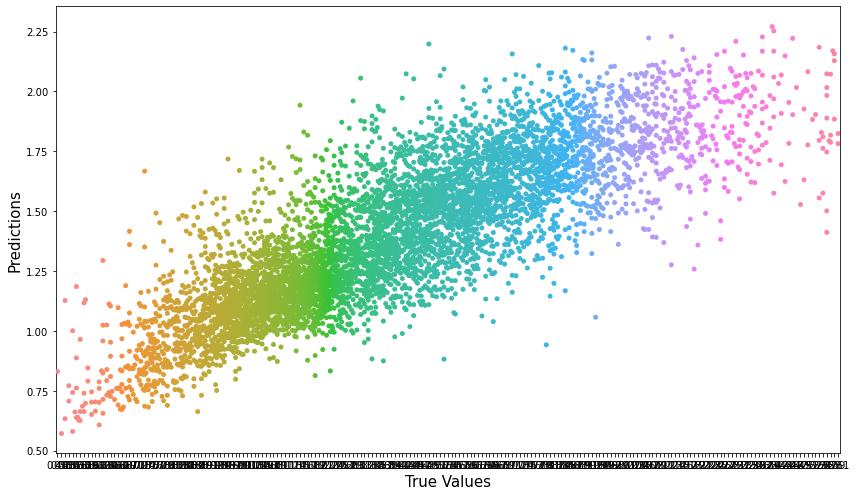

In [147]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

#### Saving the model


In [148]:
import joblib
joblib.dump(Final_mod,'Avacado.pkl')

['Avacado.pkl']